## Name : Vinay Sunil Khatate
## Task 2 :- Market Basket Analysis in Python using Apriori Algorithm
### CodeClause

## Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

In [3]:
mar=pd.read_excel("C:\\Users\\ASUS\\Downloads\\archive (8)\\Online Retail.xlsx")

In [4]:
mar

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Data cleaning

In [5]:
mar.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
mar.dropna(inplace=True)

In [11]:
mar.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
mar

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [16]:
mar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


## EDA

Text(0, 0.5, 'Products')

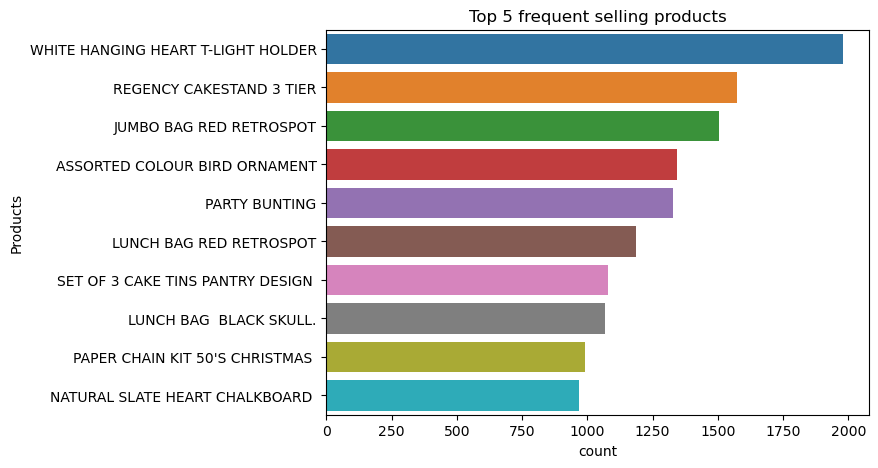

In [152]:
plt.figure(figsize=(7,5))
sns.countplot(y=mar['Description'],data=mar, order = mar["Description"].value_counts().iloc[:10].index)
plt.title("Top 5 frequent selling products")
plt.ylabel("Products")

#### The white hanging heart t-light holder is the product most often purchased by customers.

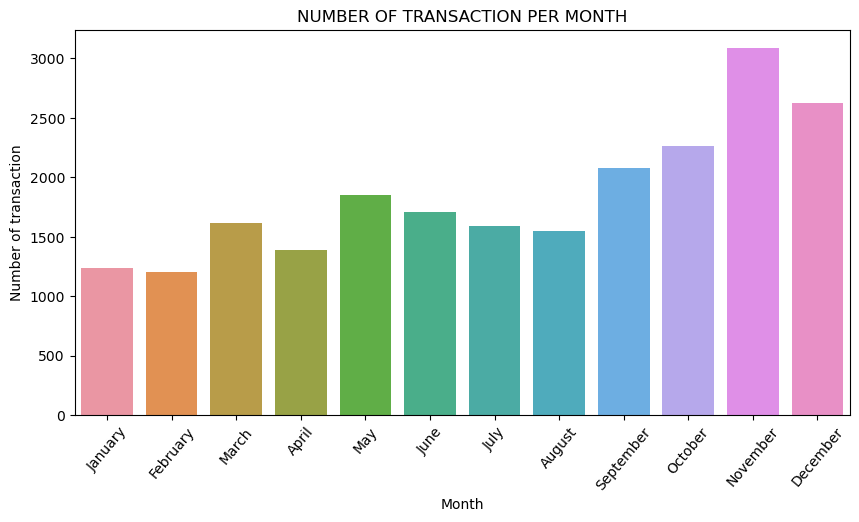

In [74]:
import datetime as dt
order_month=mar.groupby(mar['InvoiceDate'].dt.month)['InvoiceNo'].nunique()

plt.figure(figsize=(10,5))
ax=sns.barplot(x = 'InvoiceDate', y = 'InvoiceNo', data = order_month.reset_index())
ax.set_xticklabels(['January','February','March','April','May','June','July','August','September','October','November','December'], rotation = 50)
ax.set_title('NUMBER OF TRANSACTION PER MONTH')
ax.set_xlabel('Month')
ax.set_ylabel('Number of transaction')
plt.show()



#### Most transactions were in November as it was near the holidays. Also, it is likely that many people are buying gifts for Christmas in November.

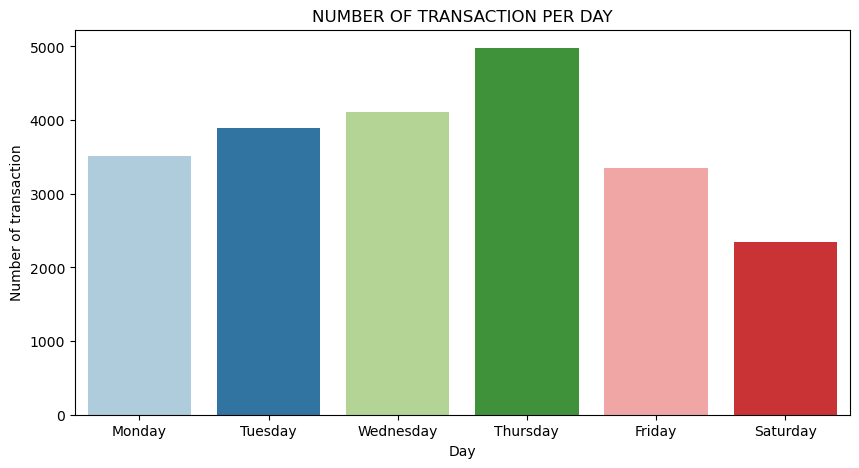

In [75]:
order_day=mar.groupby(mar['InvoiceDate'].dt.dayofweek)['InvoiceNo'].nunique()
plt.figure(figsize=(10,5))
ax1=sns.barplot(x = 'InvoiceDate', y = 'InvoiceNo', data = order_day.reset_index(),palette='Paired')
ax1.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
ax1.set_title('NUMBER OF TRANSACTION PER DAY')
ax1.set_xlabel('Day')
ax1.set_ylabel('Number of transaction')
plt.show()



#### Thursday is the busiest day and Saturday is the least busy day.

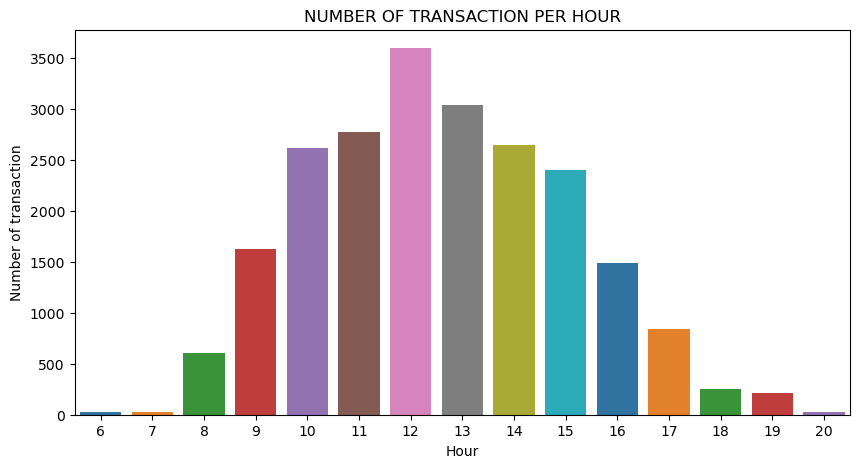

In [80]:
order_hour = mar.groupby(mar['InvoiceDate'].dt.hour)['InvoiceNo'].nunique()
plt.figure(figsize=(10,5))
ax1=sns.barplot(x = 'InvoiceDate', y = 'InvoiceNo', data = order_hour.reset_index(),palette='tab10')
ax1.set_title('NUMBER OF TRANSACTION PER HOUR')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Number of transaction')
plt.show()



#### Most orders are between 12 AM and 1PM. There is a possibility because at that time people take a break from work and can order goods at online retail.

## Top 5 customers who spend the most money on Online Retail?


In [81]:
mar['TotalPrice'] = mar['Quantity']*mar['UnitPrice']
mar.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [94]:
price_cust = pd.pivot_table(mar, index='CustomerID', values='TotalPrice', aggfunc=np.sum)
print('The following are 5 customers who spend the most money on Online Retail:')
pc=price_cust.sort_values('TotalPrice', ascending=False)
pc.head()

The following are 5 customers who spend the most money on Online Retail:


,TotalPrice
CustomerID,
14646.0,279489.02
18102.0,256438.49
17450.0,187482.17
14911.0,132572.62
12415.0,123725.45


#### Customer with ID 14646 is the customer who spent the most money in online retail, which is $280,206.02



## Top five most frequent customer shopping in Online Retail?


In [97]:
order_cust = pd.pivot_table(mar, index='CustomerID', values='InvoiceNo', aggfunc=pd.Series.nunique)
print('The following are the 5 customers who most frequently shop at Online Retail:')
oc=order_cust.sort_values('InvoiceNo', ascending=False)
oc.head()

The following are the 5 customers who most frequently shop at Online Retail:


,InvoiceNo
CustomerID,
14911.0,248
12748.0,224
17841.0,169
14606.0,128
13089.0,118


#### Customer with ID 14911 is the most frequent customer shopping in online retail, with 248 transactions.


In [101]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


## Training data 

In [102]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [104]:
print('Top 5 Country in Online Retail:')
mar['Country'].value_counts()[:5]

Top 5 Country in Online Retail:


United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Name: Country, dtype: int64

In [105]:
mar = mar[mar['Country']=='United Kingdom']
mar.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [106]:
basket = mar.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
my_basket_sets = basket.applymap(encode_units)
my_basket_sets.drop('POSTAGE', axis = 1, inplace = True)
my_basket_sets.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
#Generatig frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.02, use_colnames=True)

D:\Users\ASUS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [125]:
#generating rules
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

In [141]:
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)
my_rules.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.072871,0.040892,0.025482,0.349689,8.551447,0.022502,1.474845,0.952468
11,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.040892,0.072871,0.025482,0.623153,8.551447,0.022502,2.460225,0.920711
19,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.050159,0.056403,0.024374,0.485944,8.615523,0.021545,1.835590,0.930608
18,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.056403,0.050159,0.024374,0.432143,8.615523,0.021545,1.672677,0.936767
6,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.034144,0.030820,0.023971,0.702065,22.779253,0.022919,3.252989,0.989900
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.030820,0.034144,0.023971,0.777778,22.779253,0.022919,4.346351,0.986505
23,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.042705,0.056403,0.023720,0.555425,9.847379,0.021311,2.122467,0.938530
22,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.056403,0.042705,0.023720,0.420536,9.847379,0.021311,1.652034,0.952155
33,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.039482,0.043008,0.023065,0.584184,13.583296,0.021367,2.301479,0.964459
2,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.031576,0.037367,0.023065,0.730463,19.548240,0.021885,3.571425,0.979782


# Market Basket  Analysis

In [151]:
my_rules[ (my_rules['lift'] >= 6) &
       (my_rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.024828,0.03082,0.020345,0.819473,26.588673,0.01958,5.368602,0.986892


#### Conclusion Market Basket Analysis
From the market basket analysis, it is found that customers who buy PINK REGENCY TEACUP AND SAUCER tend to buy GREEN REGENCY TEACUP AND SAUCER. The three most frequent associations for lift over 6 and confidence above 8 are items related to teacup and saucer. Perhaps we can provide more color variants on the teacup.